D-1 PERCOBAAN HISTOGRAM

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

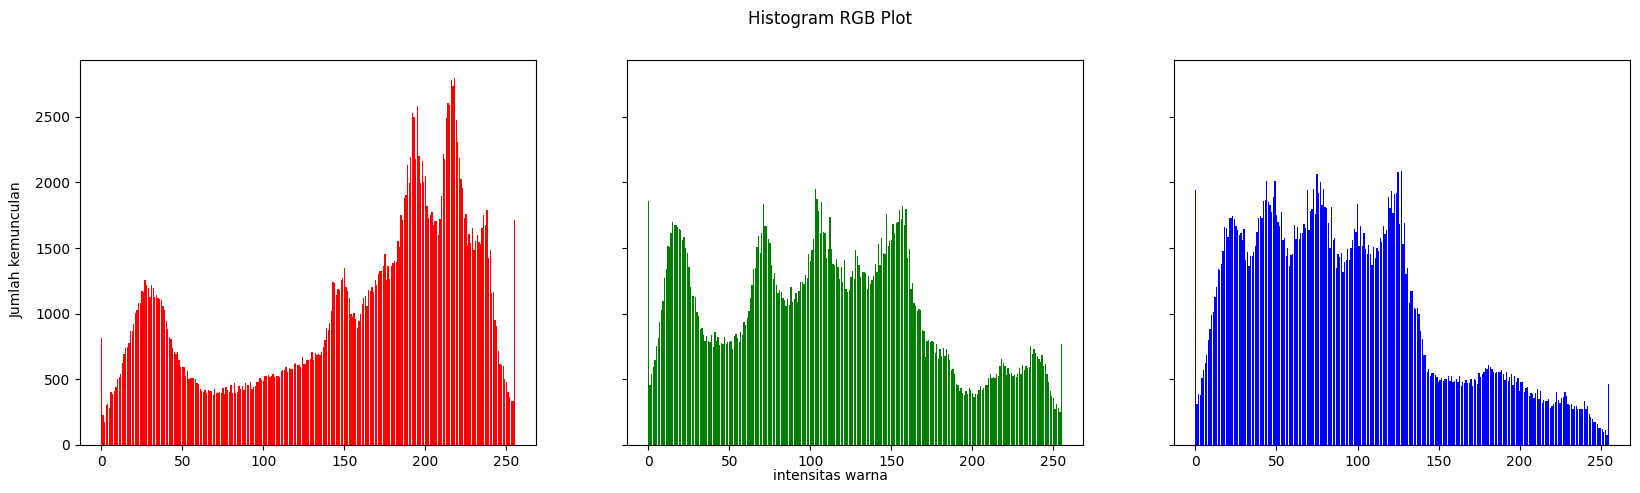

In [6]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

height, width, depth = np.shape(img)
names = np.arange(256)

red = [0]*256
green = [0]*256
blue = [0]*256

for y in range(0, height):
  for x in range(0, width):
    red[img[y,x,0]] += 1
    green[img[y,x,1]] += 1
    blue[img[y,x,2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1,3, figsize=(20,5), sharex=True ,sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'intensitas warna', ha='center')

axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

PERTANYAAN PRAKTIKUM D1

1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh
NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?
2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
gelap, terang, atau kontras rendah.

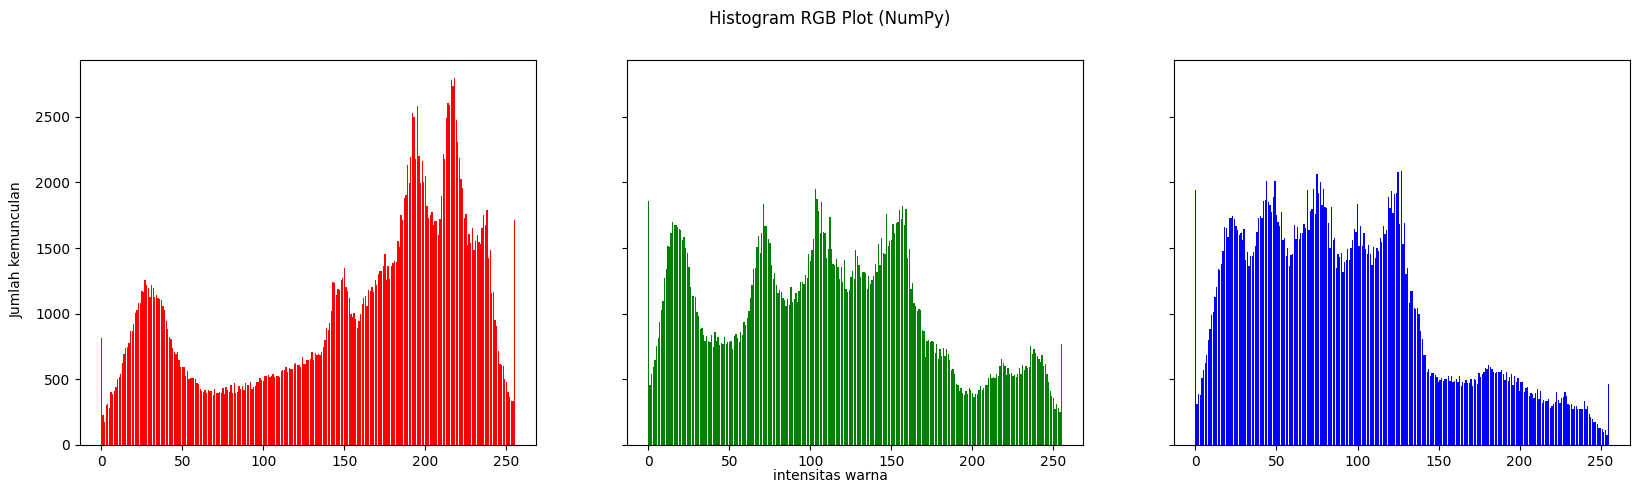

In [7]:
# 1. Buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

red_np, bins_red = np.histogram(img[:,:,0].flatten(), bins=256, range=[0,256])
green_np, bins_green = np.histogram(img[:,:,1].flatten(), bins=256, range=[0,256])
blue_np, bins_blue = np.histogram(img[:,:,2].flatten(), bins=256, range=[0,256])


fig_np, axs_np = plt.subplots(1,3, figsize=(20,5), sharex=True ,sharey=True)
fig_np.suptitle('Histogram RGB Plot (NumPy)')
fig_np.text(0.09, 0.5, 'Jumlah kemunculan', va='center', rotation='vertical')
fig_np.text(0.5, 0.04, 'intensitas warna', ha='center')

axs_np[0].bar(names, red_np, color='red')
axs_np[1].bar(names, green_np, color='green')
axs_np[2].bar(names, blue_np, color='blue')

plt.show()


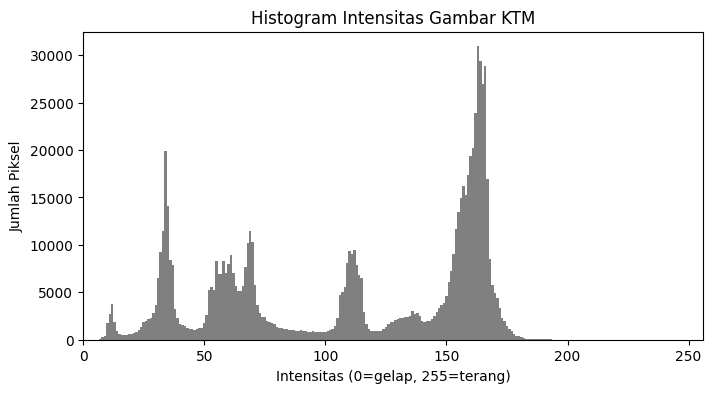

In [10]:
# 2. Buatlah histogram dengan menggunakan dengan menggunakan image KTM lama.jpg.
# Analisis distribusi intensitas dari histogram yang dihasilkan apakah gambar cenderung
# gelap, terang, atau kontras rendah.

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Baca gambar
img_ktm = cv.imread('/content/KTM_Card.jpeg')
img_ktm_gray = cv.cvtColor(img_ktm, cv.COLOR_BGR2GRAY)

# Hitung histogram
hist, bins = np.histogram(img_ktm_gray.ravel(), 256, [0, 256])

# Plot histogram
plt.figure(figsize=(8,4))
plt.bar(bins[:-1], hist, width=1, color='gray')
plt.xlim([0, 256])
plt.xlabel("Intensitas (0=gelap, 255=terang)")
plt.ylabel("Jumlah Piksel")
plt.title("Histogram Intensitas Gambar KTM")
plt.show()


Analisis Hasil dari Histogram KTM :
- puncak tinggi di sekitar intensitas 140–160 (area abu-abu terang).

- distribusi yang cukup besar di intensitas rendah (sekitar 30–70).

- Bagian kanan (200 ke atas) relatif kosong → artinya hampir tidak ada area putih terang.

- Histogram menyebar cukup lebar (0–160), tapi konsentrasi utama ada di level gelap–sedang (30–70) dan level agak terang (140–160).

D-2 PERCOBAAN HISTOGRAM EQUALIZATION

1. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

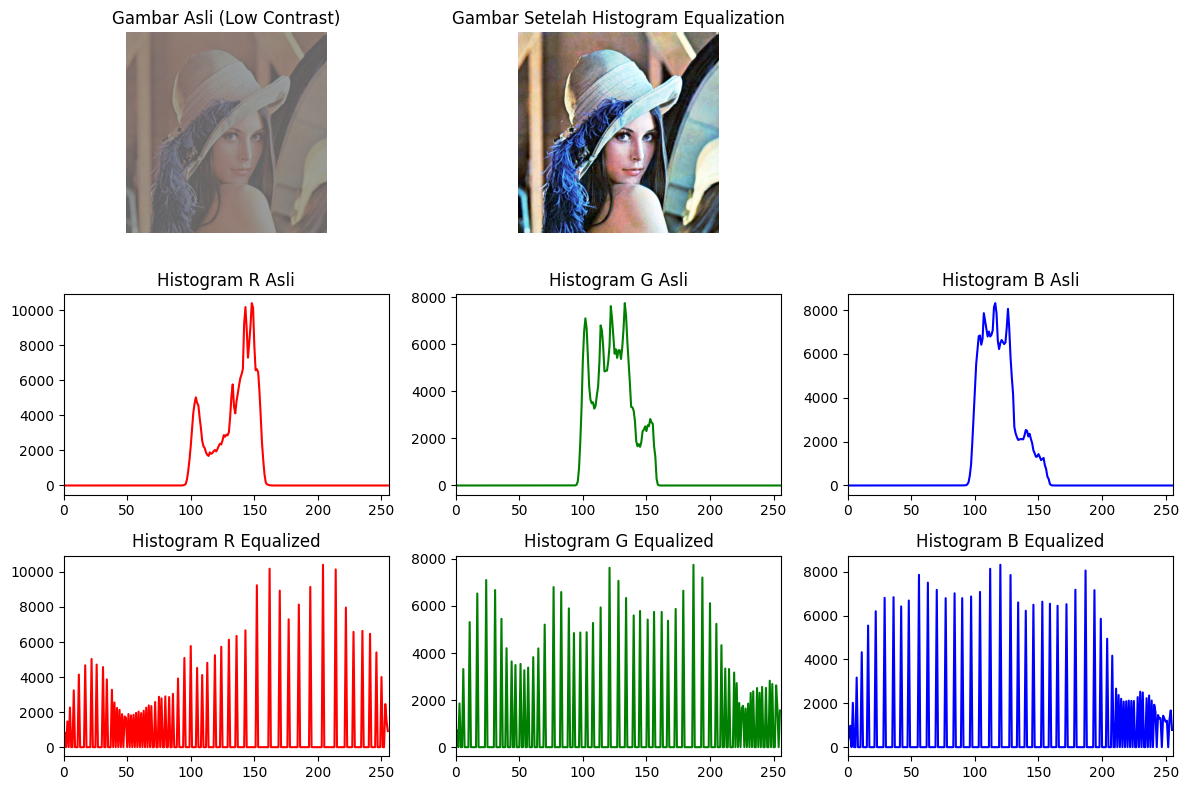

In [16]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar lena low contrast
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Equalization per channel (R,G,B)
channels = cv.split(img)
eq_channels = [cv.equalizeHist(ch) for ch in channels]
img_eq = cv.merge(eq_channels)


fig, axes = plt.subplots(3, 3, figsize=(12,8))

# Gambar asli dan equalized
axes[0,0].imshow(img)
axes[0,0].set_title("Gambar Asli (Low Contrast)")
axes[0,0].axis("off")

axes[0,1].imshow(img_eq)
axes[0,1].set_title("Gambar Setelah Histogram Equalization")
axes[0,1].axis("off")

# Kosongkan cell [0,2] biar rapi
axes[0,2].axis("off")

# Warna untuk channel
colors = ('r','g','b')
titles = ('R','G','B')

# Histogram asli
for i, col in enumerate(colors):
    hist = cv.calcHist([channels[i]], [0], None, [256], [0,256])
    axes[1,i].plot(hist, color=col)
    axes[1,i].set_xlim([0,256])
    axes[1,i].set_title(f"Histogram {titles[i]} Asli")

# Histogram equalized
for i, col in enumerate(colors):
    hist = cv.calcHist([eq_channels[i]], [0], None, [256], [0,256])
    axes[2,i].plot(hist, color=col)
    axes[2,i].set_xlim([0,256])
    axes[2,i].set_title(f"Histogram {titles[i]} Equalized")

plt.tight_layout()
plt.show()


 2. Setelah mengerjakan langkah no. 1, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist” seperti pada
potongan kode berikut ini.

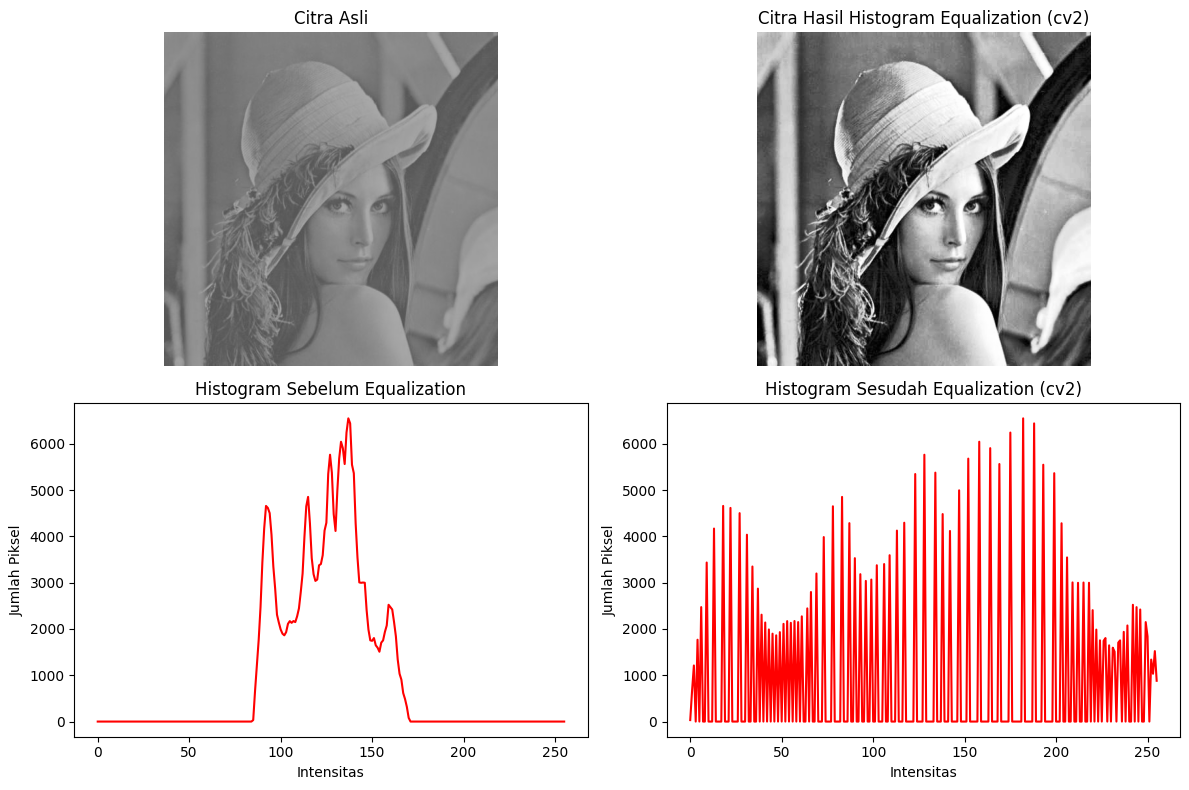

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc.jpg')

# Split channel B, G, R
b, g, r = cv.split(img)

# Equalisasi tiap channel
eq_b = cv.equalizeHist(b)
eq_g = cv.equalizeHist(g)
eq_r = cv.equalizeHist(r)

# Gabungkan kembali menjadi citra equalized
img_eq = cv.merge((eq_b, eq_g, eq_r))

# Hitung histogram sebelum dan sesudah
hist_before = cv.calcHist([img],[0],None,[256],[0,256])
hist_after  = cv.calcHist([img_eq],[0],None,[256],[0,256])


plt.figure(figsize=(12,8))

# Citra asli
plt.subplot(2,2,1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Citra Asli")
plt.axis("off")

# Citra equalized
plt.subplot(2,2,2)
plt.imshow(cv.cvtColor(img_eq, cv.COLOR_BGR2RGB))
plt.title("Citra Hasil Histogram Equalization (cv2)")
plt.axis("off")

# Histogram sebelum
plt.subplot(2,2,3)
plt.plot(hist_before, color='r')
plt.title("Histogram Sebelum Equalization")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

# Histogram sesudah
plt.subplot(2,2,4)
plt.plot(hist_after, color='r')
plt.title("Histogram Sesudah Equalization (cv2)")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

plt.tight_layout()
plt.show()


PERTANYAAN PRAKTIKUM D2

1. Perbandingan Citra Lena </br>
a. Gunakan hasil histogram equalization pada citra lena.jpg. </br>

Jawaban:
- Citra asli (low contrast) terlihat lebih kusam dan rentang intensitas sempit.

- Citra hasil equalization kontrasnya meningkat, distribusi intensitas lebih merata pada histogram.

b. Hitung nilai PSNR antara citra asli dan citra hasil equalization. </br>

Jawaban: </br>
Rumus PSNR:

$$
PSNR = 10 \cdot \log_{10} \left( \frac{MAX_I^2}{MSE} \right)
$$

dengan: </br>

$$
MAX_I = 255
$$

dan </br>

$$
MSE = \frac{1}{m \cdot n} \sum (I_{asli} - I_{equalized})^2
$$


In [22]:
import cv2 as cv
import numpy as np

# Baca gambar asli dan hasil equalization
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_gs_lc.jpg', cv.IMREAD_GRAYSCALE)
img_eq = cv.equalizeHist(img)

# Hitung MSE
mse = np.mean((img.astype(np.float64) - img_eq.astype(np.float64)) ** 2)

# Hitung PSNR
if mse == 0:
    psnr = float('inf')
else:
    psnr = 10 * np.log10((255 ** 2) / mse)

print("MSE:", mse)
print("PSNR:", psnr, "dB")


MSE: 2870.8125801086426
PSNR: 13.550755201935889 dB


Hasilnya dari PSNR menggunakan gambar lena adalah: </br>
MSE: 2870.8125801086426 </br>
PSNR: 13.550755201935889 dB

c. Apakah nilai PSNR tinggi atau rendah? Apa arti nilai tersebut terhadap kualitas
visual citra? Apakah ada detail baru yang muncul setelah equalization?

Jawaban: </br>
- PSNR Tinggi (≥ 30 dB): perbedaan kecil, citra hasil hampir sama kualitasnya dengan citra asli.

- PSNR Rendah (< 30 dB): banyak perubahan, kualitas dianggap berkurang relatif terhadap citra asli.

Pada histogram equalization, biasanya PSNR tidak terlalu tinggi (sekitar 15–25 dB) karena transformasi cukup signifikan.

Artinya: meskipun PSNR rendah, kualitas visual justru lebih baik (kontras meningkat).

Ada detail baru yang muncul: bagian gelap menjadi lebih jelas, area terang lebih seimbang. Jadi citra lebih informatif meskipun secara numerik PSNR menurun.

2. Gunakan Citra KTM Lama.jpg </br>
a. Terapkan histogram equalization pada citra KTM lama.jpg.

jawaban: </br>
Histogram equalization adalah teknik untuk meratakan distribusi intensitas citra sehingga kontras citra meningkat.

Pada citra berwarna (RGB), biasanya equalization tidak langsung diterapkan pada tiap channel (karena bisa merusak warna), melainkan pada channel luminance (Y) di ruang warna YCrCb atau HSV (Value).

Hasil:

Citra asli: tampak agak gelap, warna kurang seimbang (dominan biru tua).

Setelah equalization: citra lebih cerah, detail lebih jelas pada wajah, teks kuning “ALEXANDER AGUNG RAYA”, dan logo latar belakang jadi lebih kelihatan.


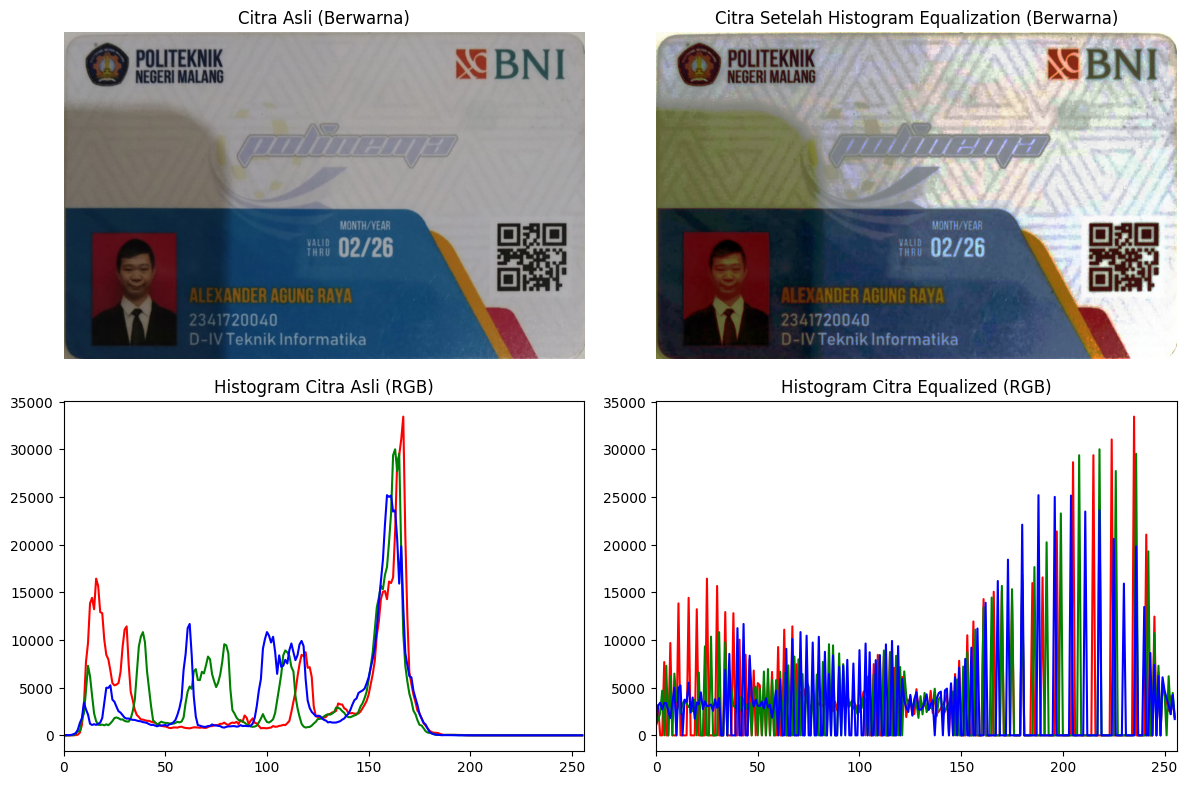

In [26]:
import cv2 as cv
import matplotlib.pyplot as plt

# Baca gambar berwarna
img = cv.imread("/content/KTM_Card.jpeg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Split channel (R, G, B)
r, g, b = cv.split(img_rgb)

# Histogram Equalization per channel
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)

# Gabungkan kembali hasil equalized
img_eq = cv.merge((r_eq, g_eq, b_eq))

# Hitung histogram (sebelum & sesudah)
colors = ('r', 'g', 'b')
plt.figure(figsize=(12,8))

# Gambar asli
plt.subplot(2,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli (Berwarna)")
plt.axis("off")

# Gambar equalized
plt.subplot(2,2,2)
plt.imshow(img_eq)
plt.title("Citra Setelah Histogram Equalization (Berwarna)")
plt.axis("off")

# Histogram asli
plt.subplot(2,2,3)
for i, col in enumerate(colors):
    hist = cv.calcHist([img_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
plt.title("Histogram Citra Asli (RGB)")
plt.xlim([0,256])

# Histogram setelah equalization
plt.subplot(2,2,4)
for i, col in enumerate(colors):
    hist = cv.calcHist([img_eq], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
plt.title("Histogram Citra Equalized (RGB)")
plt.xlim([0,256])

plt.tight_layout()
plt.show()


b. Tampilkan citra asli, citra hasil equalization, serta histogram keduanya
dalam satu layout.

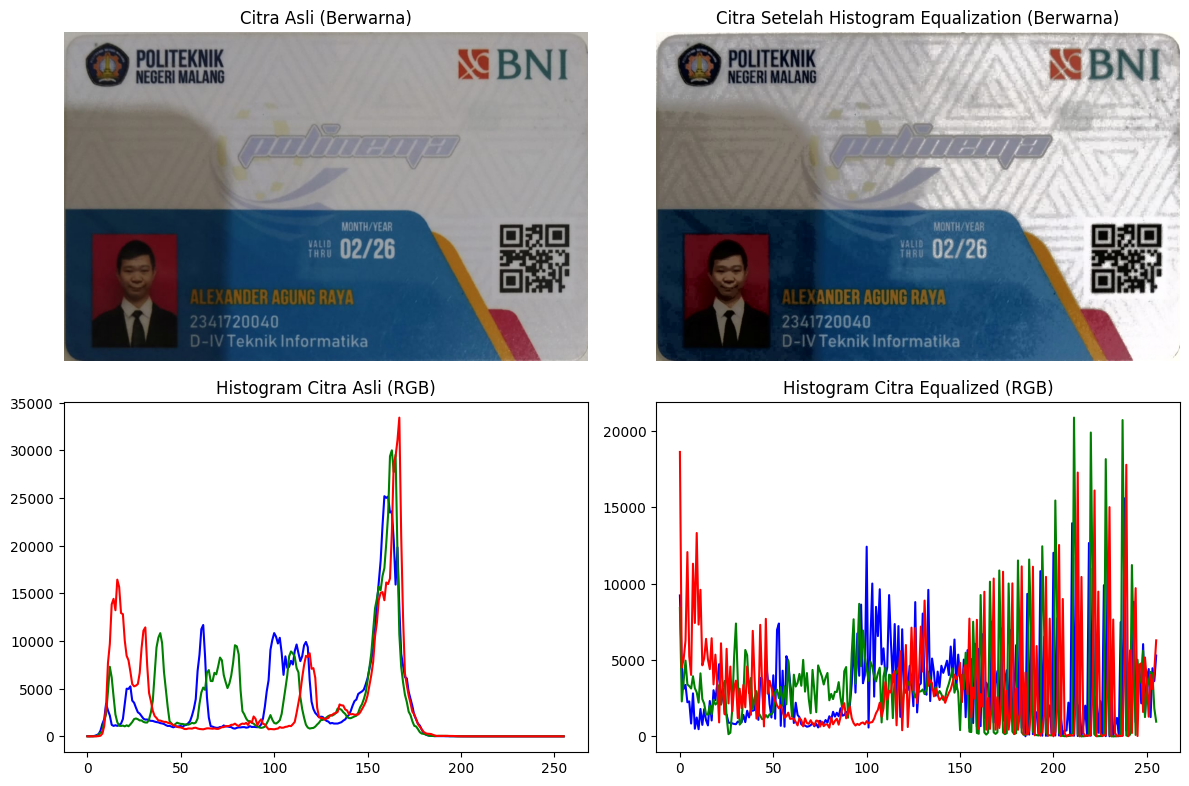

In [27]:
import cv2
import matplotlib.pyplot as plt

# Load citra
img = cv2.imread("/content/KTM_Card.jpeg")

# Konversi ke YCrCb untuk equalization di channel Y
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)

# Histogram Equalization pada channel Y
y_eq = cv2.equalizeHist(y)
ycrcb_eq = cv2.merge((y_eq, cr, cb))
img_eq = cv2.cvtColor(ycrcb_eq, cv2.COLOR_YCrCb2BGR)

# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# 1. Citra asli
axs[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0,0].set_title("Citra Asli (Berwarna)")
axs[0,0].axis("off")

# 2. Citra hasil equalization
axs[0,1].imshow(cv2.cvtColor(img_eq, cv2.COLOR_BGR2RGB))
axs[0,1].set_title("Citra Setelah Histogram Equalization (Berwarna)")
axs[0,1].axis("off")

# 3. Histogram citra asli
color = ('b','g','r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img],[i],None,[256],[0,256])
    axs[1,0].plot(hist, color=col)
axs[1,0].set_title("Histogram Citra Asli (RGB)")

# 4. Histogram citra equalized
for i, col in enumerate(color):
    hist = cv2.calcHist([img_eq],[i],None,[256],[0,256])
    axs[1,1].plot(hist, color=col)
axs[1,1].set_title("Histogram Citra Equalized (RGB)")

plt.tight_layout()
plt.show()


c. Bandingkan citra KTM lama.jpg sebelum dan sesudah histogram equalization.
Jelaskan perbedaan yang terlihat secara visual (misalnya pada detail wajah,
teks, atau latar belakang). Apakah perubahan tersebut meningkatkan kualitas
informasi dari citra atau justru membuat citra terlihat terlalu “keras”.

Jawaban: </br>
Perbandingan Visual:
Detail wajah:

- Citra asli: wajah terlihat agak gelap, detail ekspresi dan garis wajah kurang jelas.

- Setelah equalization: wajah jadi lebih terang, detail lebih terlihat, tapi ada kesan sedikit “keras” di area wajah.

- Teks (nama, NIM, jurusan, expired date, dll.)

  - Citra asli: teks terbaca cukup baik, tapi pada bagian dengan latar belakang biru, kontrasnya kurang tinggi.

  - Setelah equalization: teks terlihat lebih jelas karena latar belakang jadi lebih cerah dan kontras meningkat.

- Latar belakang (warna biru & motif KTM)

  - Citra asli: bagian biru agak gelap, motif samar.

  - Setelah equalization: warna biru lebih terang dan motif latar belakang muncul lebih jelas, meskipun beberapa area tampak terlalu tajam.


**Analisis Histogram (berdasarkan hasil citra)**

- Citra asli : distribusi intensitas cenderung menumpuk di rentang tengah, sehingga tampak agak “pucat” dan kontras rendah.

- Setelah equalization :  distribusi intensitas lebih merata ke seluruh rentang (0–255), membuat kontras naik secara signifikan.

D-3 TUGAS PRAKTIKUM DITHERING


1. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

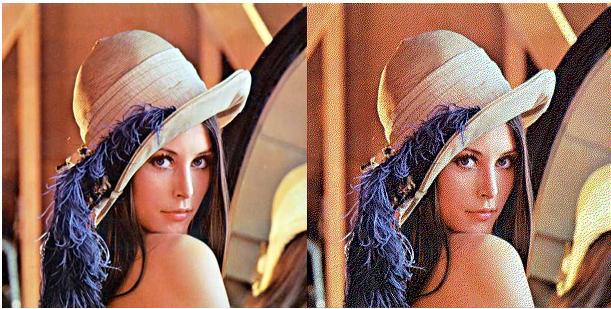

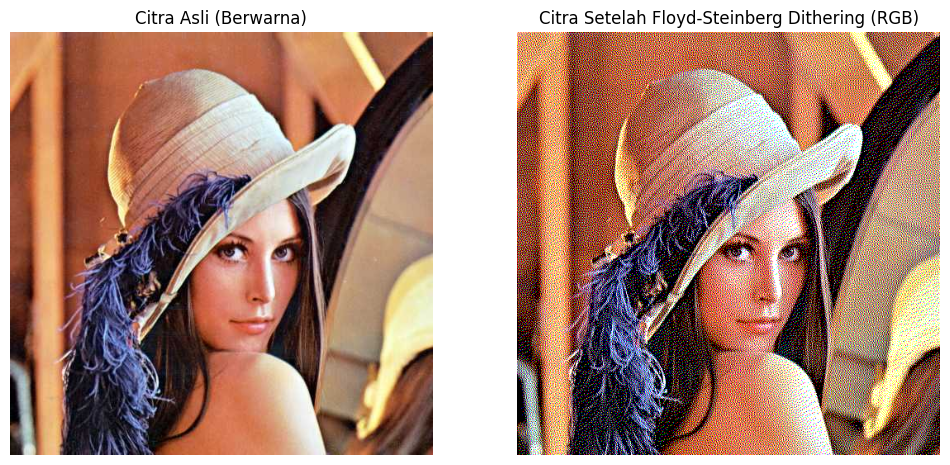

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load citra berwarna
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/lena.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h, w, c = img_rgb.shape

# Buat float
dithered = img_rgb.astype(float)

# Terapkan Floyd-Steinberg untuk setiap channel (R, G, B)
for ch in range(3):
    for y in range(h):
        for x in range(w):
            old_pixel = dithered[y, x, ch]
            new_pixel = 0 if old_pixel < 128 else 255
            dithered[y, x, ch] = new_pixel
            error = old_pixel - new_pixel

            if x + 1 < w:
                dithered[y, x+1, ch] += error * 7/16
            if y + 1 < h and x > 0:
                dithered[y+1, x-1, ch] += error * 3/16
            if y + 1 < h:
                dithered[y+1, x, ch] += error * 5/16
            if y + 1 < h and x + 1 < w:
                dithered[y+1, x+1, ch] += error * 1/16

# Konversi kembali ke uint8
dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_rgb)
plt.title("Citra Asli (Berwarna)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(dithered)
plt.title("Citra Setelah Floyd-Steinberg Dithering (RGB)")
plt.axis("off")

plt.show()


2. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini! </br>
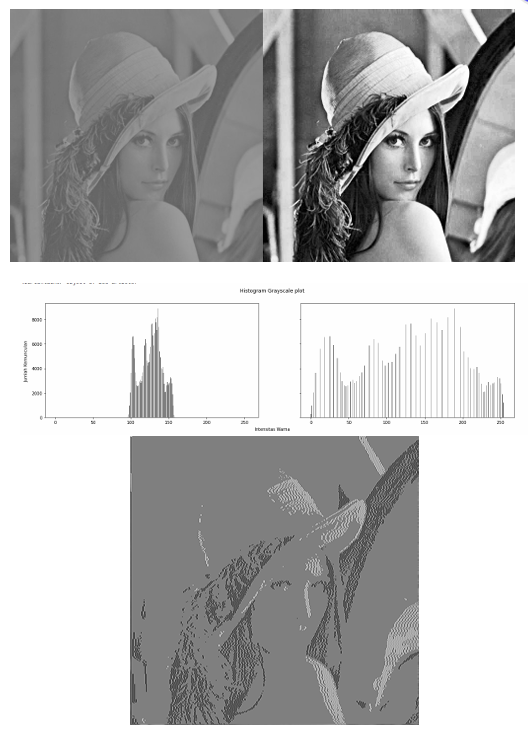

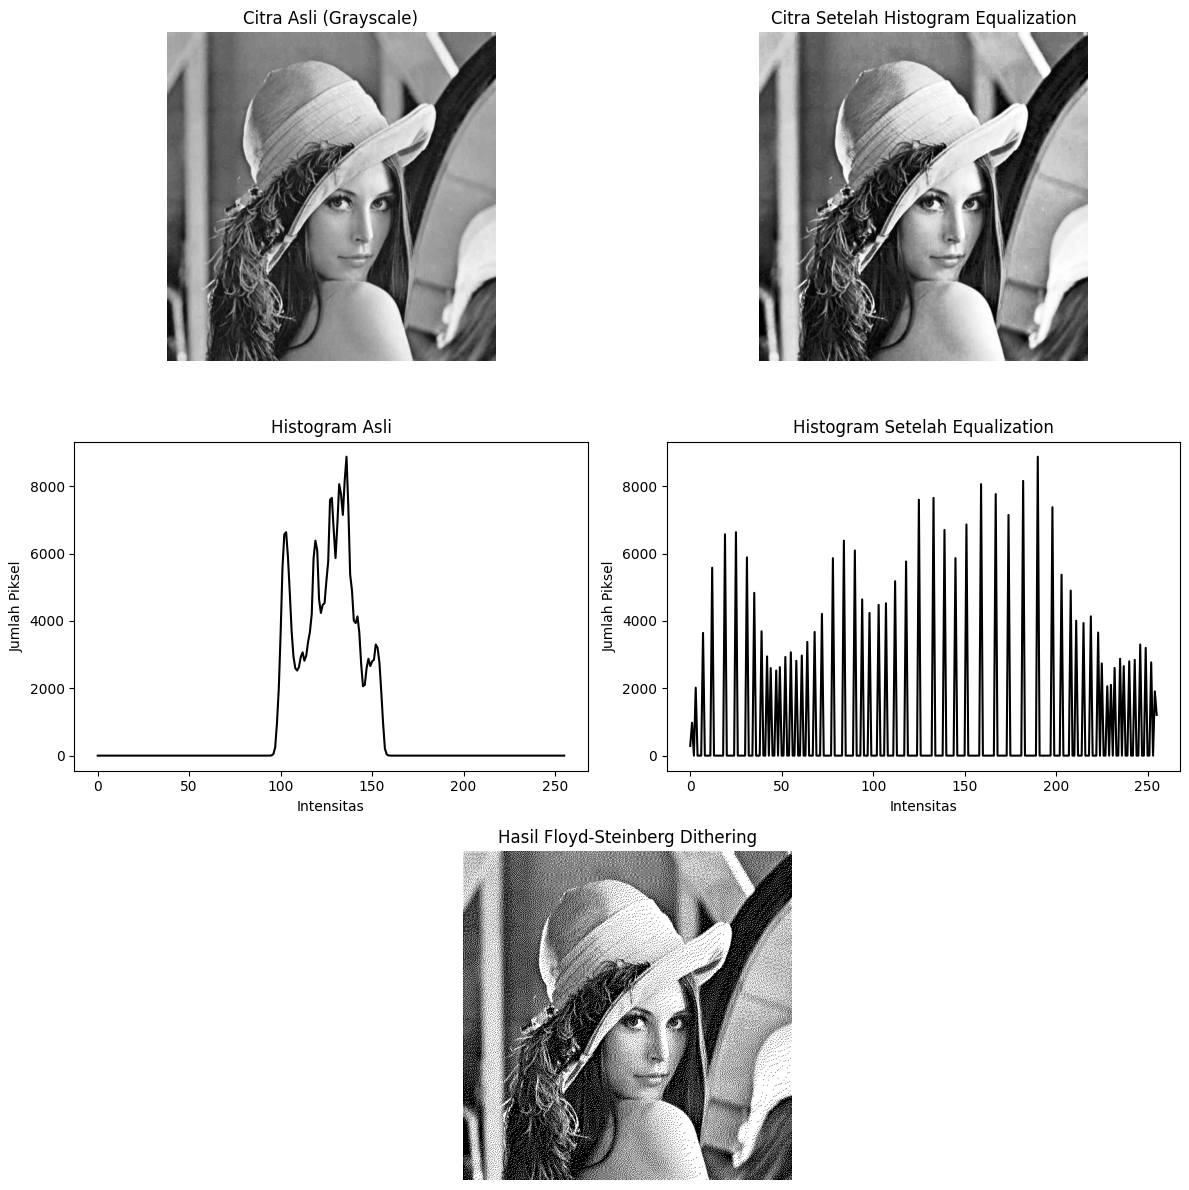

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load Gambar
img = cv2.imread("/content/drive/MyDrive/PCVK/Images/lena_lc.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Histogram Equalization
eq = cv2.equalizeHist(gray)

# 3. Hitung histogram sebelum & sesudah
hist_orig = cv2.calcHist([gray], [0], None, [256], [0,256])
hist_eq = cv2.calcHist([eq], [0], None, [256], [0,256])

# 4. Floyd-Steinberg dithering pada hasil equalization
h, w = eq.shape
dithered = eq.astype(float)

for y in range(h):
    for x in range(w):
        old_pixel = dithered[y, x]
        new_pixel = 0 if old_pixel < 128 else 255
        dithered[y, x] = new_pixel
        error = old_pixel - new_pixel

        if x + 1 < w:
            dithered[y, x+1] += error * 7/16
        if y + 1 < h and x > 0:
            dithered[y+1, x-1] += error * 3/16
        if y + 1 < h:
            dithered[y+1, x] += error * 5/16
        if y + 1 < h and x + 1 < w:
            dithered[y+1, x+1] += error * 1/16

dithered = np.clip(dithered, 0, 255).astype(np.uint8)

# 5. Plot hasil
plt.figure(figsize=(12,12))

# Gambar asli
plt.subplot(3,2,1)
plt.imshow(gray, cmap="gray")
plt.title("Citra Asli (Grayscale)")
plt.axis("off")

# Gambar setelah equalization
plt.subplot(3,2,2)
plt.imshow(eq, cmap="gray")
plt.title("Citra Setelah Histogram Equalization")
plt.axis("off")

# Histogram asli
plt.subplot(3,2,3)
plt.plot(hist_orig, color='black')
plt.title("Histogram Asli")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

# Histogram setelah equalization
plt.subplot(3,2,4)
plt.plot(hist_eq, color='black')
plt.title("Histogram Setelah Equalization")
plt.xlabel("Intensitas")
plt.ylabel("Jumlah Piksel")

# Hasil dithering
plt.subplot(3,1,3)
plt.imshow(dithered, cmap="gray")
plt.title("Hasil Floyd-Steinberg Dithering")
plt.axis("off")

plt.tight_layout()
plt.show()
